In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv("Economy-index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop unneccessary columns
df_index.drop(columns=["Unnamed: 0",'year','month'],inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
# Lets do some viualization

import seaborn as sns

C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


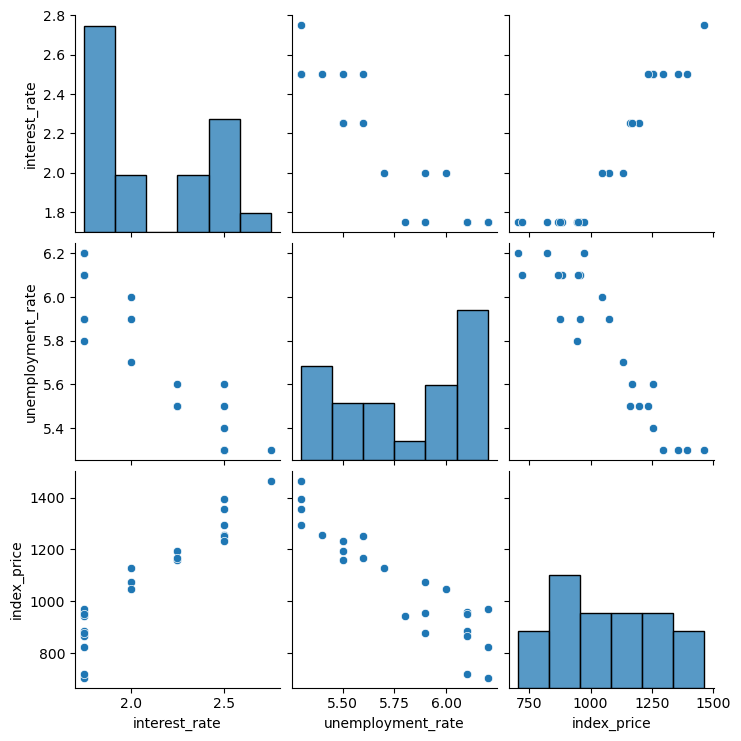

In [9]:
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.936606
unemployment_rate,-0.925814,1.000000,-0.922152
index_price,0.936606,-0.922152,1.000000


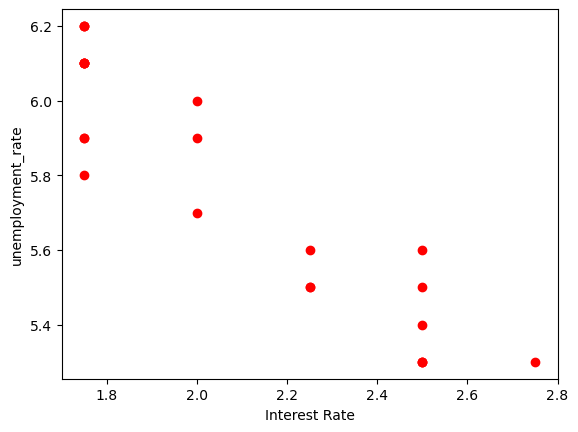

In [12]:
## VIsualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('unemployment_rate')
plt.show()

In [13]:
# Independent and dependent features
x=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']

In [14]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42)

In [18]:
import seaborn as sns

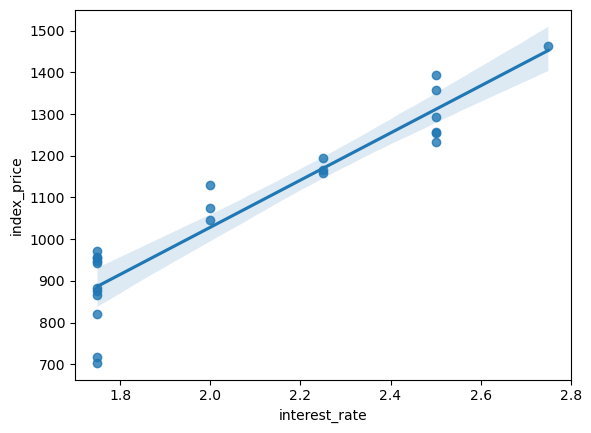

In [21]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

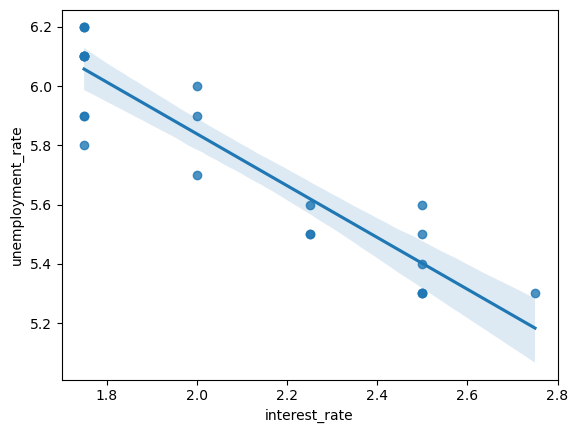

In [22]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)
plt.show()

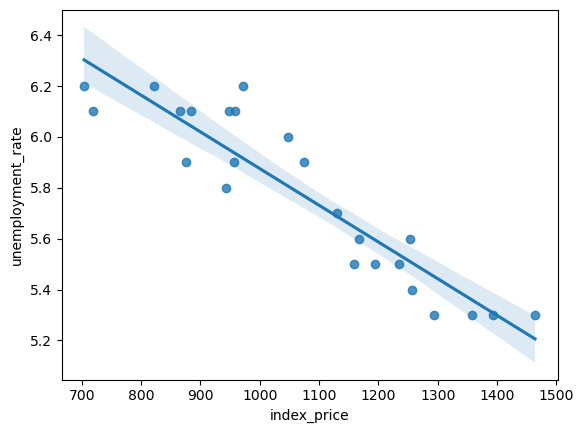

In [23]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
x_train

array([[-0.8660254 ,  1.27807831],
       [ 0.8660254 , -1.14354375],
       [ 0.        , -0.3363364 ],
       [-0.8660254 ,  0.06726728],
       [-0.8660254 ,  1.27807831],
       [ 1.73205081, -1.14354375]])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',
                                  cv=3)

In [34]:
np.mean(validation_score)

-7820.7562405517665

In [35]:
# Prediction
y_pred = reg.predict(x_test)

In [36]:
y_pred


array([1146.20748698,  797.05686794, 1280.87888652,  839.95271184,
        950.18425551, 1103.31164308,  925.74439964, 1256.43903065,
        797.05686794, 1127.75149895, 1256.43903065,  907.28841161,
        839.95271184, 1256.43903065, 1213.54318675,  797.05686794,
        839.95271184,  925.74439964])

In [37]:
# Perfrormannce Metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10647.749498327881
89.47791862049174
103.18793291043232


In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
# Display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7575206665171275
0.7251900887194112


## Assumptions


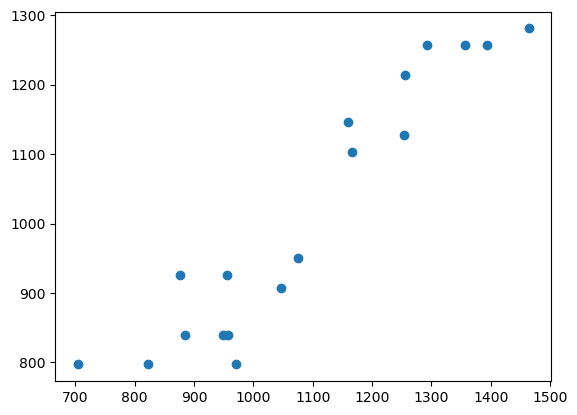

In [39]:
plt.scatter(y_test,y_pred)

In [40]:
residuals = y_test-y_pred
print(residuals)

8      12.792513
16    173.943132
0     183.121113
18     44.047288
11    124.815744
9      63.688357
13     30.255600
1     137.560969
21     24.943132
5     126.248501
2     100.560969
12    139.711588
15    118.047288
3      36.560969
4      42.456813
22    -93.056868
17    109.047288
20    -49.744400
Name: index_price, dtype: float64


C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


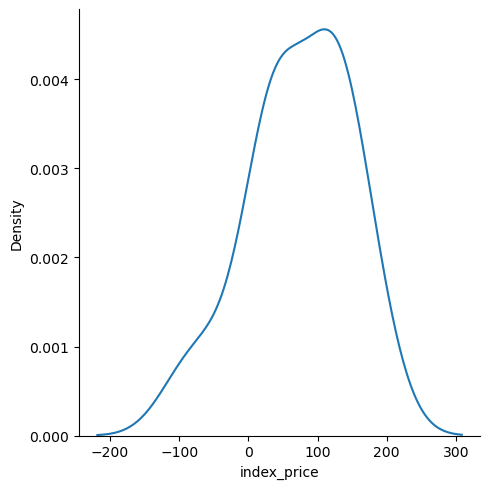

In [41]:
# plot this residuals
sns.displot(residuals,kind='kde')

In [42]:
# Scatter plot with respect to prediction and residuals

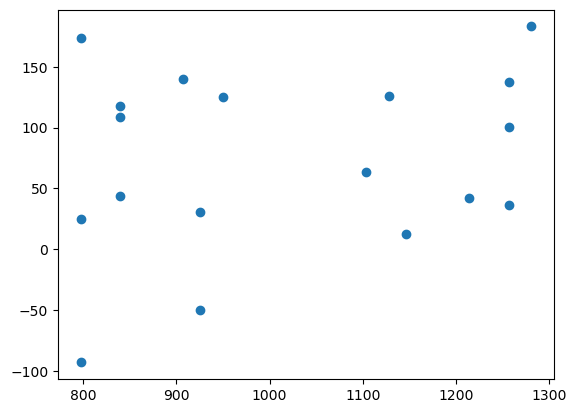

In [43]:
plt.scatter(y_pred,residuals)

In [44]:
# OLS Linear Regression
import statsmodels.api as sm

In [45]:
model=sm.OLS(y_train,x_train).fit()

In [48]:
model.summary()

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.455
Method:                 Least Squares   F-statistic:                            0.06202
Date:                Tue, 13 Feb 2024   Prob (F-statistic):                       0.941
Time:                        13:23:01   Log-Likelihood:                         -50.055
No. Observations:                   6   AIC:                                      104.1
Df Residuals:                       4   BIC:                                      103.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.6963   1044.618      0.033      0.975   -2865.627    2935.020
x2          -147.7716   1044.618     -0.141      0.894   -3048.095    2752.552
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.006
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.437
Skew:                           0.168   Prob(JB):                        0.804
Kurtosis:                       1.721   Cond. No.                         3.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(reg.coef_)

[  34.69626498 -147.77156853]
